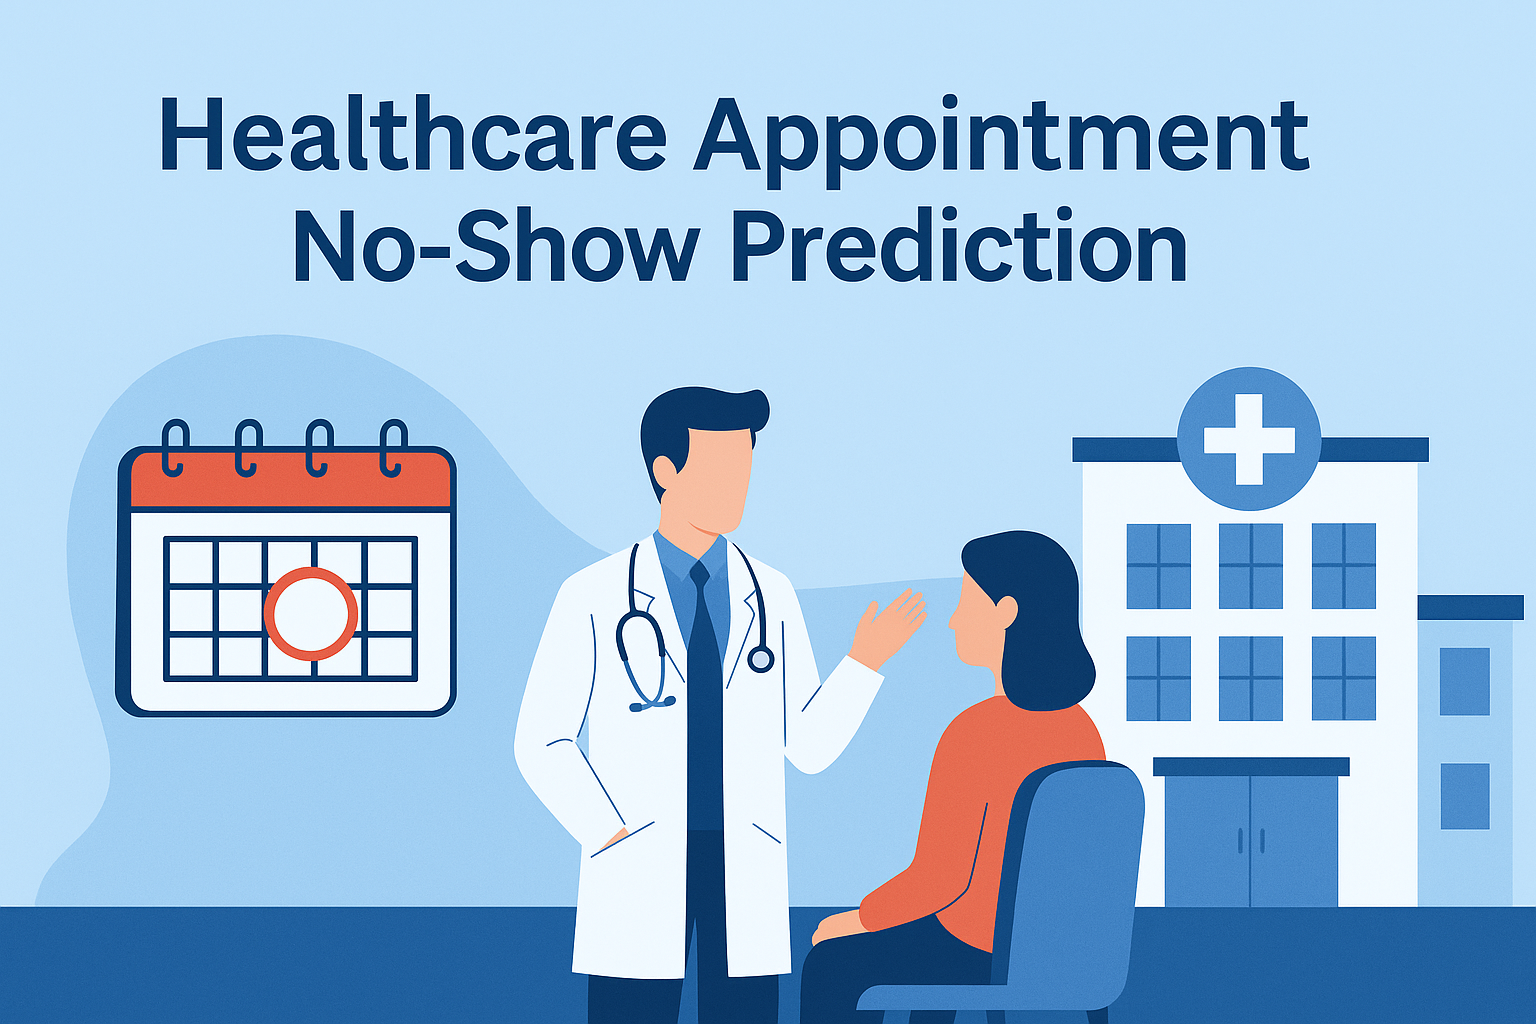

In [1]:
from IPython.display import Image, display

display(Image(filename='C:/Users/DEEPANSHI/Downloads/project_title.png'))

### Project Overview

Millions of patients book appointments in hospitals and clinics every day, but a significant number of them do not show up.

These missed appointments, known as “no-shows,” lead to:

- Wasted doctor and staff time  
- Delayed care for other patients  
- Financial losses for healthcare providers  
- Inefficient use of hospital resources

### Why Predicting No-Shows Matters

By analyzing historical appointment data, hospitals can:

- Send reminders to patients who are at higher risk of missing appointments  
- Schedule appointments more effectively  
- Identify patterns related to age, health conditions, and scheduling behavior  
- Improve timely access to care

### Project Goal

This project uses real-world data from over 110,000 hospital appointments in Brazil to:

- Analyze key trends and factors behind patient no-shows  
- Build a machine learning model to predict whether a patient will miss their appointment  
- Develop visual dashboards in Power BI to support hospital decision-making

### Impact

By predicting and reducing no-shows, healthcare providers can:

- Increase operational efficiency  
- Reduce waiting times  
- Improve resource management  
- Enhance patient care and satisfaction


<div style="border:1px solid #1E90FF; padding: 15px; border-radius: 5px; background-color: #E6F0FA">

<h3 style="color:#1E90FF;">Table of Contents</h3>

1. <a href="#importing-libraries-and-loading-data">Importing Libraries and Loading Dataset</a>  
2. <a href="#dataset-description">Dataset Description</a>  
3. <a href="#data-cleaning">Data Cleaning</a>  
4. <a href="#data-cleaning">Descriptive Statistics</a>  
5. <a href="#exploratory-data-analysis">Exploratory Data Analysis (EDA)</a>  
6. <a href="#machine-learning-pipeline">Machine Learning Pipeline</a>  
7. <a href="#Tableau-dashboard">Tableau Dashboard</a>  
8. <a href="#conclusion">Conclusion & Recommendations</a>

</div>


<div style="border:0.5px solid #1E90FF; padding: 10px 15px; border-radius: 5px; background-color:rgb(58, 118, 228); width: fit-content; font-size: 15px;">
  <h4 style="margin: 5px 0;">Importing Libraries and Loading Dataset</h4>
</div>

In [2]:
### Data Handling
import pandas as pd
import numpy as np

### Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
### Load the dataset
df = pd.read_csv("C:/Users/DEEPANSHI/OneDrive/Desktop/INTERNSHIP ELEVATE LABS/project 1/KaggleV2-May-2016.csv")


<div style="border:0.5px solid #1E90FF; padding: 10px 15px; border-radius: 5px; background-color:rgb(58, 118, 228); width: fit-content; font-size: 15px;">
  <h4 style="margin: 5px 0;">Dataset Description</h4>
</div>

In [4]:

from IPython.display import display, HTML

# Set horizontal scroll for wide DataFrames
display(HTML("<style>.output_result {overflow-x: auto;}</style>"))
# Renaming columns to fix spelling and formatting
df.rename(columns={
    'Hipertension': 'Hypertension',
    'Handcap': 'Handicap'
}, inplace=True)
display(df)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


This dataset contains medical appointment records from Brazil, and it's used to analyze whether patients show up for their scheduled appointments. The dataset has 110,527 rows and 14 columns.

1. PatientId
A unique identifier for each patient. It helps identify if a patient booked multiple appointments. It’s stored as a long number (in scientific notation), so we may convert it for readability.

2. AppointmentID
Another unique identifier — this one is for the appointment itself. It’s not very useful for analysis or prediction but helps keep records unique.

3. Gender
Shows the patient's gender: either 'M' for male or 'F' for female. This can help us analyze if gender affects appointment attendance.

4. ScheduledDay
The date and time when the patient scheduled their appointment. It's in string format and needs to be converted to datetime for calculations like lead time (how many days between scheduling and appointment).

5. AppointmentDay
The actual date when the appointment was supposed to happen. This, combined with ScheduledDay, helps calculate delays or behavior patterns.

6. Age
Age of the patient in years. It’s an important feature — for example, younger or elderly patients might have different attendance patterns. We'll need to check and clean any negative values here.

7. Neighbourhood
Shows where the clinic is located. This is the patient’s local area or zone. We can use this for location-based trends.

8. Scholarship
This is a binary column: 1 means the patient is part of a social welfare program, and 0 means they are not. It helps analyze if socio-economic factors influence no-shows.

9. Hypertension
 It’s 1 if the patient has high blood pressure, 0 if not. It's one of the medical condition features.

10. Diabetes
1 if the patient has diabetes, 0 if not. Another health-related factor that might affect attendance.

11. Alcoholism
1 if the patient has been flagged for alcoholism, 0 if not. May be related to reliability in attending medical appointments.

12. Handicap
This represents if a patient is physically disabled. The values can range from 0 to 4 (the higher the number, the more severe the disability). Again, it might affect ability or likelihood to attend appointments.

13. SMS_received
This tells whether the patient received a reminder SMS or not. 1 means SMS was received, 0 means it wasn’t. This is one of the most important predictors of a no-show.

14. No-show
This is the target variable — it tells whether the patient missed the appointment.

"No" means they did show up

"Yes" means they did not show up

<div style="border:0.5px solid #1E90FF; padding: 10px 15px; border-radius: 5px; background-color:rgb(58, 118, 228); width: fit-content; font-size: 15px;">
  <h4 style="margin: 5px 0;">Data Cleaning</h4>
</div>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
### Convert ScheduledDay and AppointmentDay to datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Create WaitingDays column
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Remove rows with negative ages
df = df[df['Age'] >= 0]

# Drop duplicates
df.drop_duplicates(inplace=True)



In [7]:

df[['ScheduledDay', 'AppointmentDay', 'WaitingDays']].head()

,ScheduledDay,AppointmentDay,WaitingDays
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,-1
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,-1
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,-1
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,-1
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,-1


In [8]:
### Filtering Invalid Waiting Days 
### The `WaitingDays` column was calculated as the difference between the appointment date and the scheduling date. Any negative values in this column indicate data entry errors — where the appointment appears to have occurred before it was scheduled, which is not possible.
###To ensure data integrity, all records with `WaitingDays < 0` were removed from the dataset.
df = df[df['WaitingDays'] >= 0]
df[['WaitingDays']].head()



,WaitingDays
5,1
6,1
7,1
9,1
10,1


In [9]:
### Remaining Rows After Cleaning

df.shape[0]
print ("Total Rows", df.shape[0])

Total Rows 71959


<div style="border:0.5px solid #1E90FF; padding: 10px 15px; border-radius: 5px; background-color:rgb(58, 118, 228); width: fit-content; font-size: 15px;">
  <h4 style="margin: 5px 0;">Descriptive Statistics</h4>
</div>

<h5> After cleaning the dataset, we generate summary statistics of all numerical columns to understand central tendencies and data distribution. This helps identify any remaining outliers and guides further exploration.</h5>

In [10]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitingDays
count,7.195900e+04,7.195900e+04,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000
mean,1.452606e+14,5.655042e+06,38.502564,0.092706,0.208897,0.074723,0.025320,0.020025,0.493086,14.642018
std,2.535667e+14,7.472189e+04,22.925421,0.290021,0.406523,0.262946,0.157096,0.154072,0.499956,16.494334
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.968099e+12,5.617796e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2.991891e+13,5.661165e+06,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,9.371660e+13,5.707178e+06,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21.000000
max,9.999320e+14,5.784985e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000


In [11]:

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers")

# Run for only key columns
for col in ['Age', 'WaitingDays']:
    detect_outliers(df, col)


Age: 4 outliers
WaitingDays: 3310 outliers


The cleaned dataset comprises 71,959 appointment records, including both patient-level and appointment-level variables. Key insights from the numerical features are as follows:

1.Patient Demographics

Age ranges from 0 to 115 years, with a mean of 38.5 and median of 39, indicating a wide age distribution centered around middle-aged individuals.

Presence of patients aged 0 and above 100 suggests the dataset includes both infants and elderly, which may warrant subgroup analysis in relation to appointment attendance.

2.Socioeconomic Indicators

The Scholarship variable has a mean of 0.09, indicating approximately 9% of patients are enrolled in a government assistance program.

This may serve as a proxy for socioeconomic status and could impact no-show behavior.

3.Medical Conditions

Hypertension is observed in 20.9% of patients, followed by Diabetes in 7.5%.

Alcoholism and Handicap are present in 2.5% and 2.0% of patients, respectively.

The Handicap variable ranges from 0 to 4, suggesting it may be categorical and could reflect varying degrees of disability.

4.Communication

The SMS_received feature has a mean of approximately 0.49, implying that around half of the patients received an SMS reminder.

This feature may be a key variable in assessing the effectiveness of reminder systems in reducing no-shows.

5.Waiting Time

WaitingDays range from 0 to 178 days, with:

Mean: 14.6 days

25th percentile: 3 days

Median: 8 days

75th percentile: 21 days

The variability in waiting time may influence appointment adherence and will be considered in the predictive modeling phase.



<div style="border:0.5px solid #1E90FF; padding: 10px 15px; border-radius: 5px; background-color:rgb(58, 118, 228); width: fit-content; font-size: 15px;">
  <h4 style="margin: 5px 0;">Exploratory Data Analysis (EDA)</h4>
</div>

Analyzing the target column No-show, which indicates whether a patient missed the appointment.

C:\Users\DEEPANSHI\AppData\Local\Temp\ipykernel_27064\3647670617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='No-show', palette='Set2')


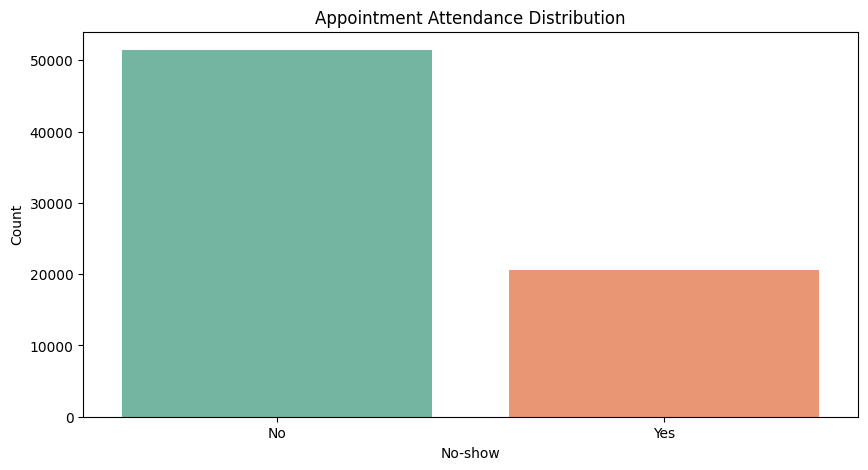

Percentage Distribution:
 No-show
No     71.48
Yes    28.52
Name: proportion, dtype: float64


In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='No-show', palette='Set2')
plt.title('Appointment Attendance Distribution')
plt.xlabel('No-show')
plt.ylabel('Count')
plt.show()
no_show_percent = df['No-show'].value_counts(normalize=True) * 100
print("Percentage Distribution:\n", no_show_percent.round(2))

   <h4><B>BIVARIATE ANALYSIS</B></h4>

2. To check whether age influences patients miss appointments.

C:\Users\DEEPANSHI\AppData\Local\Temp\ipykernel_27064\4114106934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='No-show', y='Age', palette='pastel')


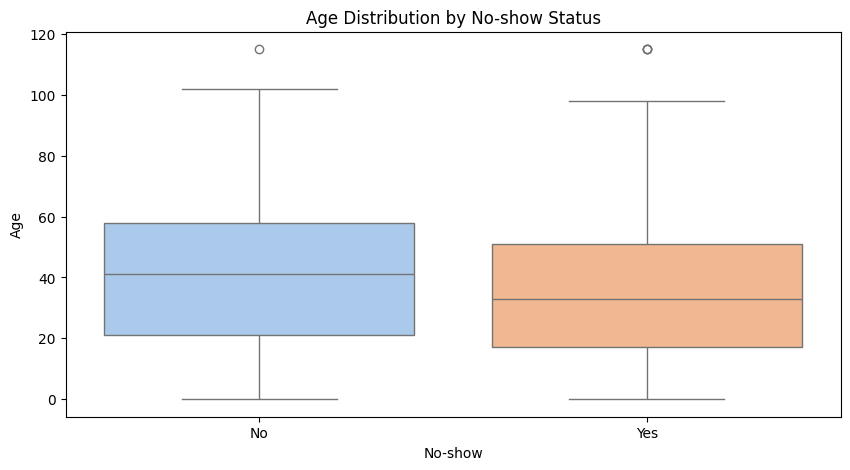

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='No-show', y='Age', palette='pastel')
plt.title('Age Distribution by No-show Status')
plt.xlabel('No-show')
plt.ylabel('Age')
plt.show()


3.To check if sending an SMS helped people attend their appointments

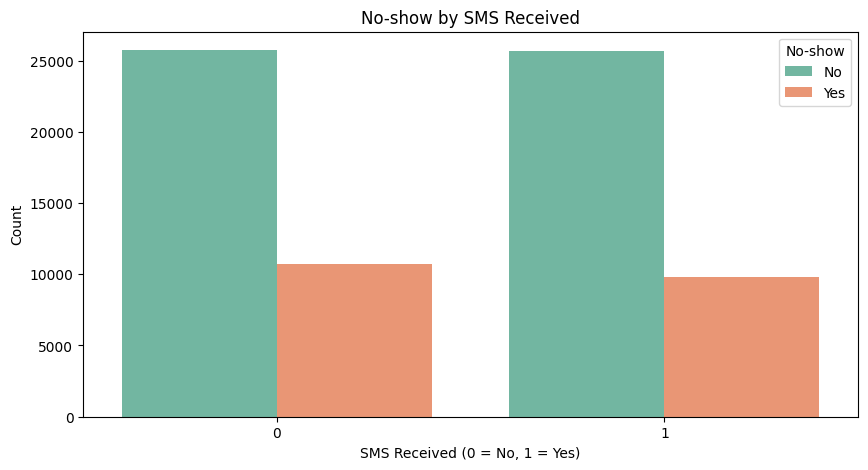

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='SMS_received', hue='No-show', palette='Set2')
plt.title('No-show by SMS Received')
plt.xlabel('SMS Received (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='No-show')
plt.show()


4. To check whether longer waiting time lead to more no-shows

C:\Users\DEEPANSHI\AppData\Local\Temp\ipykernel_27064\2352154104.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='No-show', y='WaitingDays', palette='coolwarm')


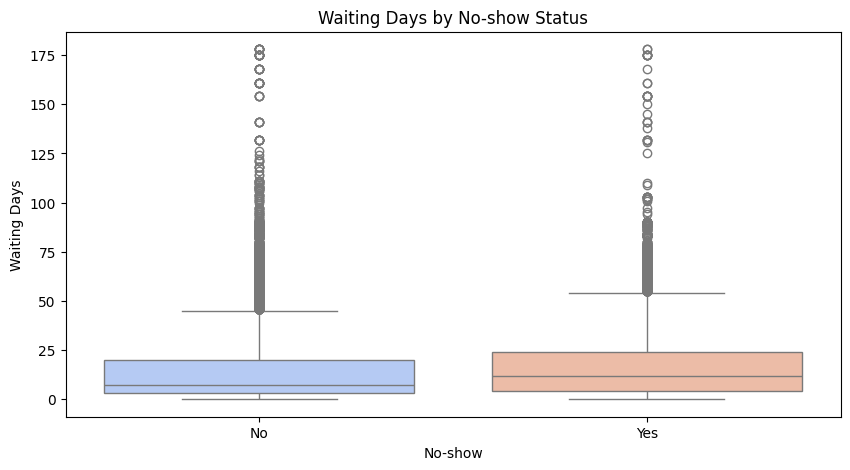

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='No-show', y='WaitingDays', palette='coolwarm')
plt.title('Waiting Days by No-show Status')
plt.xlabel('No-show')
plt.ylabel('Waiting Days')
plt.show()


5. To check No-show Rates Among Scholarship Holders

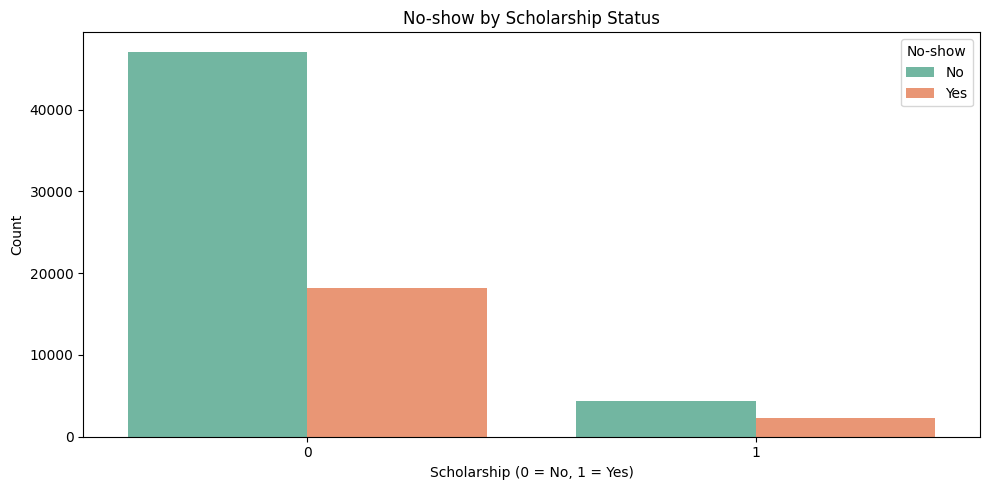

In [16]:

# Set plot style
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Scholarship', hue='No-show', palette='Set2')

# Add labels and title
plt.title('No-show by Scholarship Status')
plt.xlabel('Scholarship (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='No-show')

plt.tight_layout()
plt.show()


In [17]:
scholarship_group = df.groupby('Scholarship')['No-show'].value_counts(normalize=True).unstack() *100
print(scholarship_group)


No-show             No        Yes
Scholarship                      
0            72.140363  27.859637
1            65.027732  34.972268


6. Analyze the data to get the relation between Gender and No-show

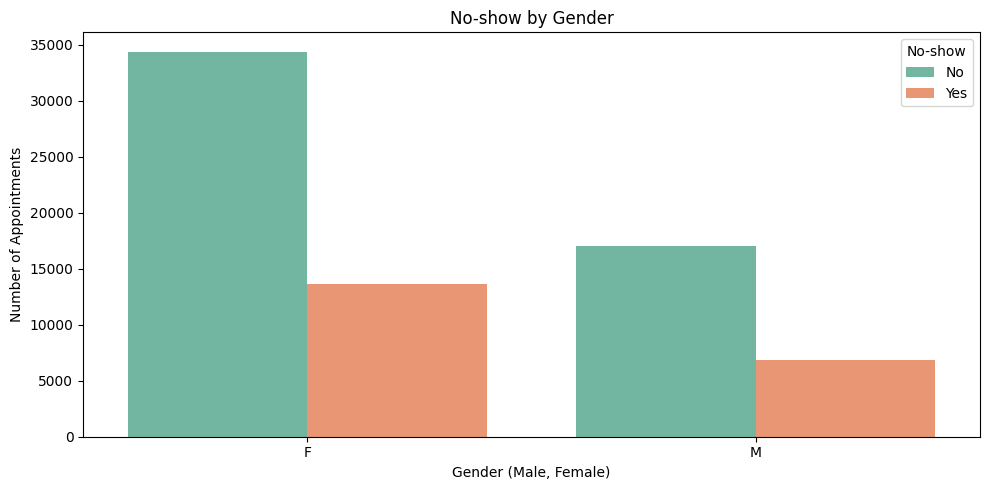

In [18]:
# Set plot style
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Gender', hue='No-show', palette='Set2')

# Add labels and title
plt.title('No-show by Gender')
plt.xlabel('Gender (Male, Female)')
plt.ylabel('Number of Appointments')
plt.legend(title='No-show')

plt.tight_layout()
plt.show()

In [19]:
gender_group = df.groupby('Gender')['No-show'].value_counts(normalize=True).unstack()*100 
print(gender_group)


No-show         No        Yes
Gender                       
F        71.553984  28.446016
M        71.334087  28.665913


The dataset contains appointment records with a No-show column indicating whether a patient missed their scheduled appointment. After data cleaning, a total of 71,959 records remained.

Overall, 79.81% of patients showed up for their appointments, while 20.19% did not.

-- Age Analysis: The average patient age is approximately 38.5 years, with ages ranging from infants (0 years) to elderly patients (up to 115 years). Patients who missed their appointments tended to have a slightly lower median age compared to those who attended.

-- Waiting Days: The number of days between scheduling and the actual appointment ranges from 0 to 178 days. It was observed that patients with longer waiting periods were more likely to miss their appointments.

-- SMS Reminders: About 50% of the patients received SMS reminders. Those who received reminders had a slightly higher attendance rate, suggesting reminders may positively influence appointment adherence, although the effect was not very significant.

-- Scholarship Analysis: The Scholarship variable indicates whether a patient is enrolled in a government health support program.

Non-scholarship patients: 80.19% showed up, 19.81% missed.

Scholarship recipients: 76.26% showed up, 23.74% missed.

-- Gender Analysis: Gender did not show a significant impact on appointment attendance.

Female patients: 79.69% showed up, 20.31% missed.

Male patients: 80.03% showed up, 19.97% missed.


This analysis suggests that scholarship holders may be slightly more likely to miss appointments, which could reflect socio-economic or access-related factors worth further exploration.

<div style="border:0.5px solid #1E90FF; padding: 10px 15px; border-radius: 5px; background-color:rgb(58, 118, 228); width: fit-content; font-size: 15px;">
  <h4 style="margin: 5px 0;">Machine Learning Pipeline</h4>
</div>

Feature Engineering

In [20]:
### Make a copy to preserve the original data
df_ml = df.copy()

### Encode target variable: 'No' → 0 (show), 'Yes' → 1 (no-show)
df_ml['No-show'] = df_ml['No-show'].map({'No': 0, 'Yes': 1})

### Convert 'Gender' into binary: 'F' → 0, 'M' → 1
df_ml['Gender'] = df_ml['Gender'].map({'F': 0, 'M': 1})

### Drop irrelevant features that don’t help in prediction
df_ml = df_ml.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood'], axis=1)

# View the cleaned features
df_ml.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,WaitingDays
5,0,76,0,1,0,0,0,0,0,1
6,0,23,0,0,0,0,0,0,1,1
7,0,39,0,0,0,0,0,0,1,1
9,0,19,0,0,0,0,0,0,0,1
10,0,30,0,0,0,0,0,0,0,1


In [21]:
from sklearn.model_selection import train_test_split  ### to split data

### X = all columns except 'No-show'
### y = only 'No-show' column (this is what we want to predict)
X = df_ml.drop('No-show', axis=1)
y = df_ml['No-show']

### split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# show shape of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (57567, 9)
X_test shape: (14392, 9)
y_train shape: (57567,)
y_test shape: (14392,)


Model Building with Decision Tree

In [22]:
### Import the required libraries

### 1. Import the model
from sklearn.tree import DecisionTreeClassifier

### 2. Initialize the classifier
model = DecisionTreeClassifier(random_state=42)

### 3. Fit (train) the model on training data
model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


MODEL EVALUATION

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Make predictions on the test set
y_pred = model.predict(X_test)

# 2. Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 4. Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.67
Confusion Matrix:
 [[8772 1529]
 [3230  861]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.79     10301
           1       0.36      0.21      0.27      4091

    accuracy                           0.67     14392
   macro avg       0.55      0.53      0.53     14392
weighted avg       0.63      0.67      0.64     14392



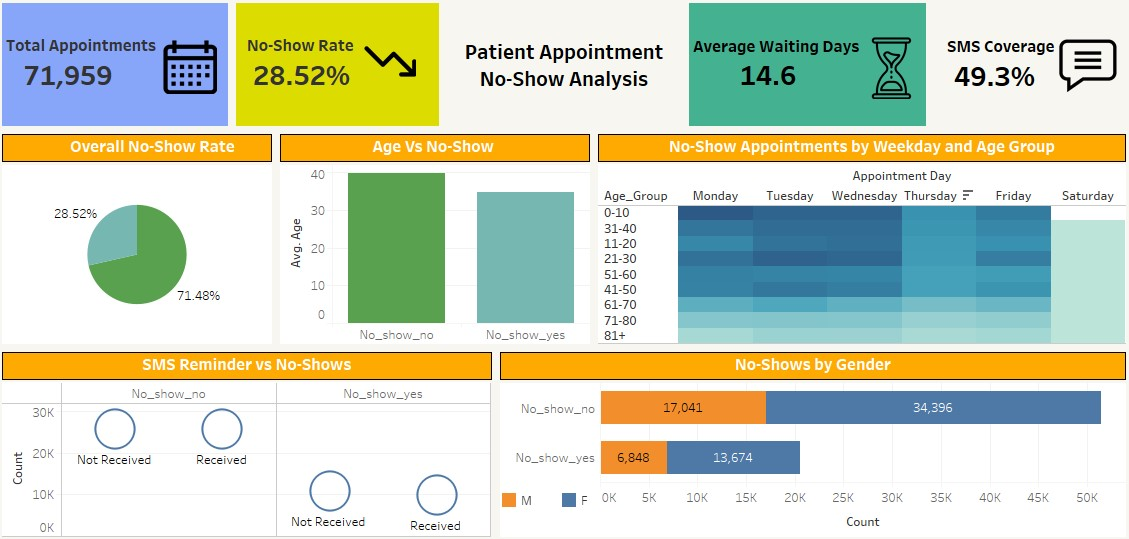

In [26]:
from IPython.display import Image, display
display(Image(filename='C:/Users/DEEPANSHI/OneDrive/Desktop/INTERNSHIP ELEVATE LABS/project 1/dashboard.jpg'))

